In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [16]:
validated_labels = pd.read_csv('data/gt.csv')
validated_labels['heading_diff'] = validated_labels['heading_diff'].abs()
validated_labels['pitch_diff'] = validated_labels['pitch_diff'].abs()
validated_labels.fillna(0,  inplace=True)
validated_labels.head()
#27655 rows -> 14518 rows Wrong 52.5%, 13137 rows Correct 47.5%

,label_id,verified,audit_task_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,clustered
0,86788,1,19418,SurfaceProblem,2.0,1.0,False,BpVD1H9f1A6URlrjPUcyZg,2,0,...,183.0625,-7.125000,358.678406,6.516869,0.0,0.0,175.615906,13.641869,POINT (-122.28125 47.698307037353516),-1
1,91037,1,21038,CurbRamp,0.0,1.0,True,g0kskJSQVRkZXwH8mmA3gA,1,0,...,34.0625,-35.000000,99.724670,-2.702782,0.0,0.0,65.662170,32.297218,POINT (-122.31624603271484 47.55794906616211),-1
2,93842,1,22195,CurbRamp,1.0,1.0,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,...,175.1875,-19.250000,299.396454,2.216354,0.0,0.0,124.208954,21.466354,POINT (-122.32888793945312 47.5999755859375),-1
3,190528,1,47238,CurbRamp,1.0,1.0,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,...,31.4375,-16.187500,132.761383,-1.222160,0.0,0.0,101.323883,14.965340,POINT (-122.3386001586914 47.6960334777832),-1
4,190672,1,47291,CurbRamp,1.0,1.0,True,00WCIfeoGC33NDp8s0_KGg,1,0,...,335.8750,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,16.118734,POINT (-122.28343200683594 47.546104431152344),-1


In [15]:
print((validated_labels['verified']== 0).sum())

14518


In [17]:
feature_cols = ['zoom', 'severity','label_tags', 'label_description', 'clustered']
X = validated_labels[feature_cols] # Features
y = validated_labels.verified # Target variable

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 70% training and 30% test

# Decision Tree classifer
clf = DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=3, min_samples_split=182, max_leaf_nodes = 15).fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6594360086767896


7


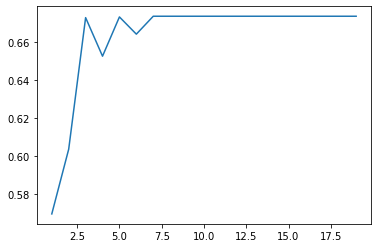

In [10]:
# find best max_depth
max_depth_range = list(range(1, 20, 1))
accuracy = []
for depth in max_depth_range:

    clf = DecisionTreeClassifier(criterion="gini", splitter = "random", max_depth=depth).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)
    
plt.plot(max_depth_range, accuracy)
print(max_depth_range[np.argmax(accuracy)])

32


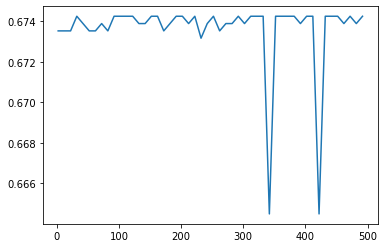

In [11]:
# find best min_samples_splitint 
min_samples_split_range = list(range(2, 500, 10))
accuracy = []
for split in min_samples_split_range:

    clf = DecisionTreeClassifier(criterion="gini", splitter = "random", max_depth=7, min_samples_split = split).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)
    
plt.plot(min_samples_split_range, accuracy)
print(min_samples_split_range[np.argmax(accuracy)])

15


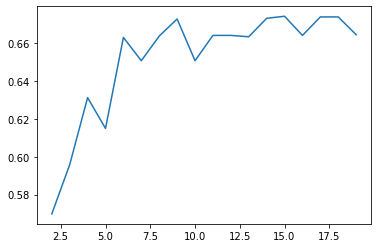

In [12]:
# find best max_leaf_nodes 
max_leaf_nodes_range = list(range(2, 20, 1))
accuracy = []
for leaf_nodes in max_leaf_nodes_range:

    clf = DecisionTreeClassifier(criterion="gini", splitter = "random", max_depth=7, min_samples_split = 180, max_leaf_nodes=leaf_nodes).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)
    
plt.plot(max_leaf_nodes_range, accuracy)
print(max_leaf_nodes_range[np.argmax(accuracy)])

In [155]:
validated_labels[(validated_labels['severity'] == 5) & (validated_labels['verified'] == 0)]
# print(validated_labels['pitch_diff'].mean())
# print(validated_labels['heading_diff'].median())


,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,verified
12867,20621,89703,Obstacle,5.0,0.0,True,kSoHmwB61ZXsiIRUdZgpDQ,0,3,1,...,306.022308,-26.696428,179.077042,-1.690369,0.0,0.0,126.945267,25.006060,POINT (-122.36327362060547 47.528141021728516),0
12872,48368,194052,NoCurbRamp,5.0,0.0,True,TgCWq-Iy-YCf_XVJEJbgqg,1,1,0,...,4.307500,-20.120001,168.250381,-0.568497,0.0,0.0,163.942882,19.551504,POINT (-122.3017349243164 47.55015563964844),0
12880,50840,203570,Obstacle,5.0,0.0,False,wWuZ7ldBwlKcKruJ0bIK8g,1,3,0,...,6.812500,-22.187500,359.043274,0.174759,0.0,0.0,352.230774,22.362259,POINT (-122.32847595214844 47.69118881225586),0
12881,50921,203971,Obstacle,5.0,1.0,True,ibv0uEIrfIBakevAvqM5ug,2,1,1,...,166.875000,-30.125000,356.409302,-3.508453,1.0,0.0,189.534302,26.616547,POINT (-122.31057739257812 47.55797576904297),0
12882,51004,204286,Obstacle,5.0,0.0,False,KDtSlY__47VdljIQ7b1ocg,0,1,0,...,259.122498,-35.000000,180.410507,-1.953064,0.0,0.0,78.711990,33.046936,POINT (-122.33943939208984 47.703636169433594),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25532,21514,92322,CurbRamp,5.0,0.0,True,7VVm-TYtM7W6PMcSSJSkbw,0,0,0,...,315.482147,-28.812500,217.926498,-0.414604,0.0,0.0,97.555649,28.397896,POINT (-122.34807586669922 47.52106475830078),0
26132,23909,98881,CurbRamp,5.0,0.0,True,H63bUHnw_lSszjL32iu0bg,0,1,0,...,89.000000,-10.000000,311.961426,-0.292038,0.0,0.0,222.961426,9.707962,POINT (-122.2901382446289 47.6295166015625),0
26471,30733,121252,CurbRamp,5.0,0.0,True,BtTMtEzsfCjdEgzQ57Ubvw,0,1,0,...,257.125000,-14.375000,235.862305,4.164146,0.0,0.0,21.262695,18.539146,POINT (-122.32320404052734 47.606300354003906),0
26518,4073,13702,CurbRamp,5.0,1.0,True,NmrL83rcDvIrpE9s4REDBg,1,0,0,...,123.013390,-23.236607,93.264496,-0.793480,0.0,0.0,29.748894,22.443127,POINT (-122.33480834960938 47.59824752807617),0


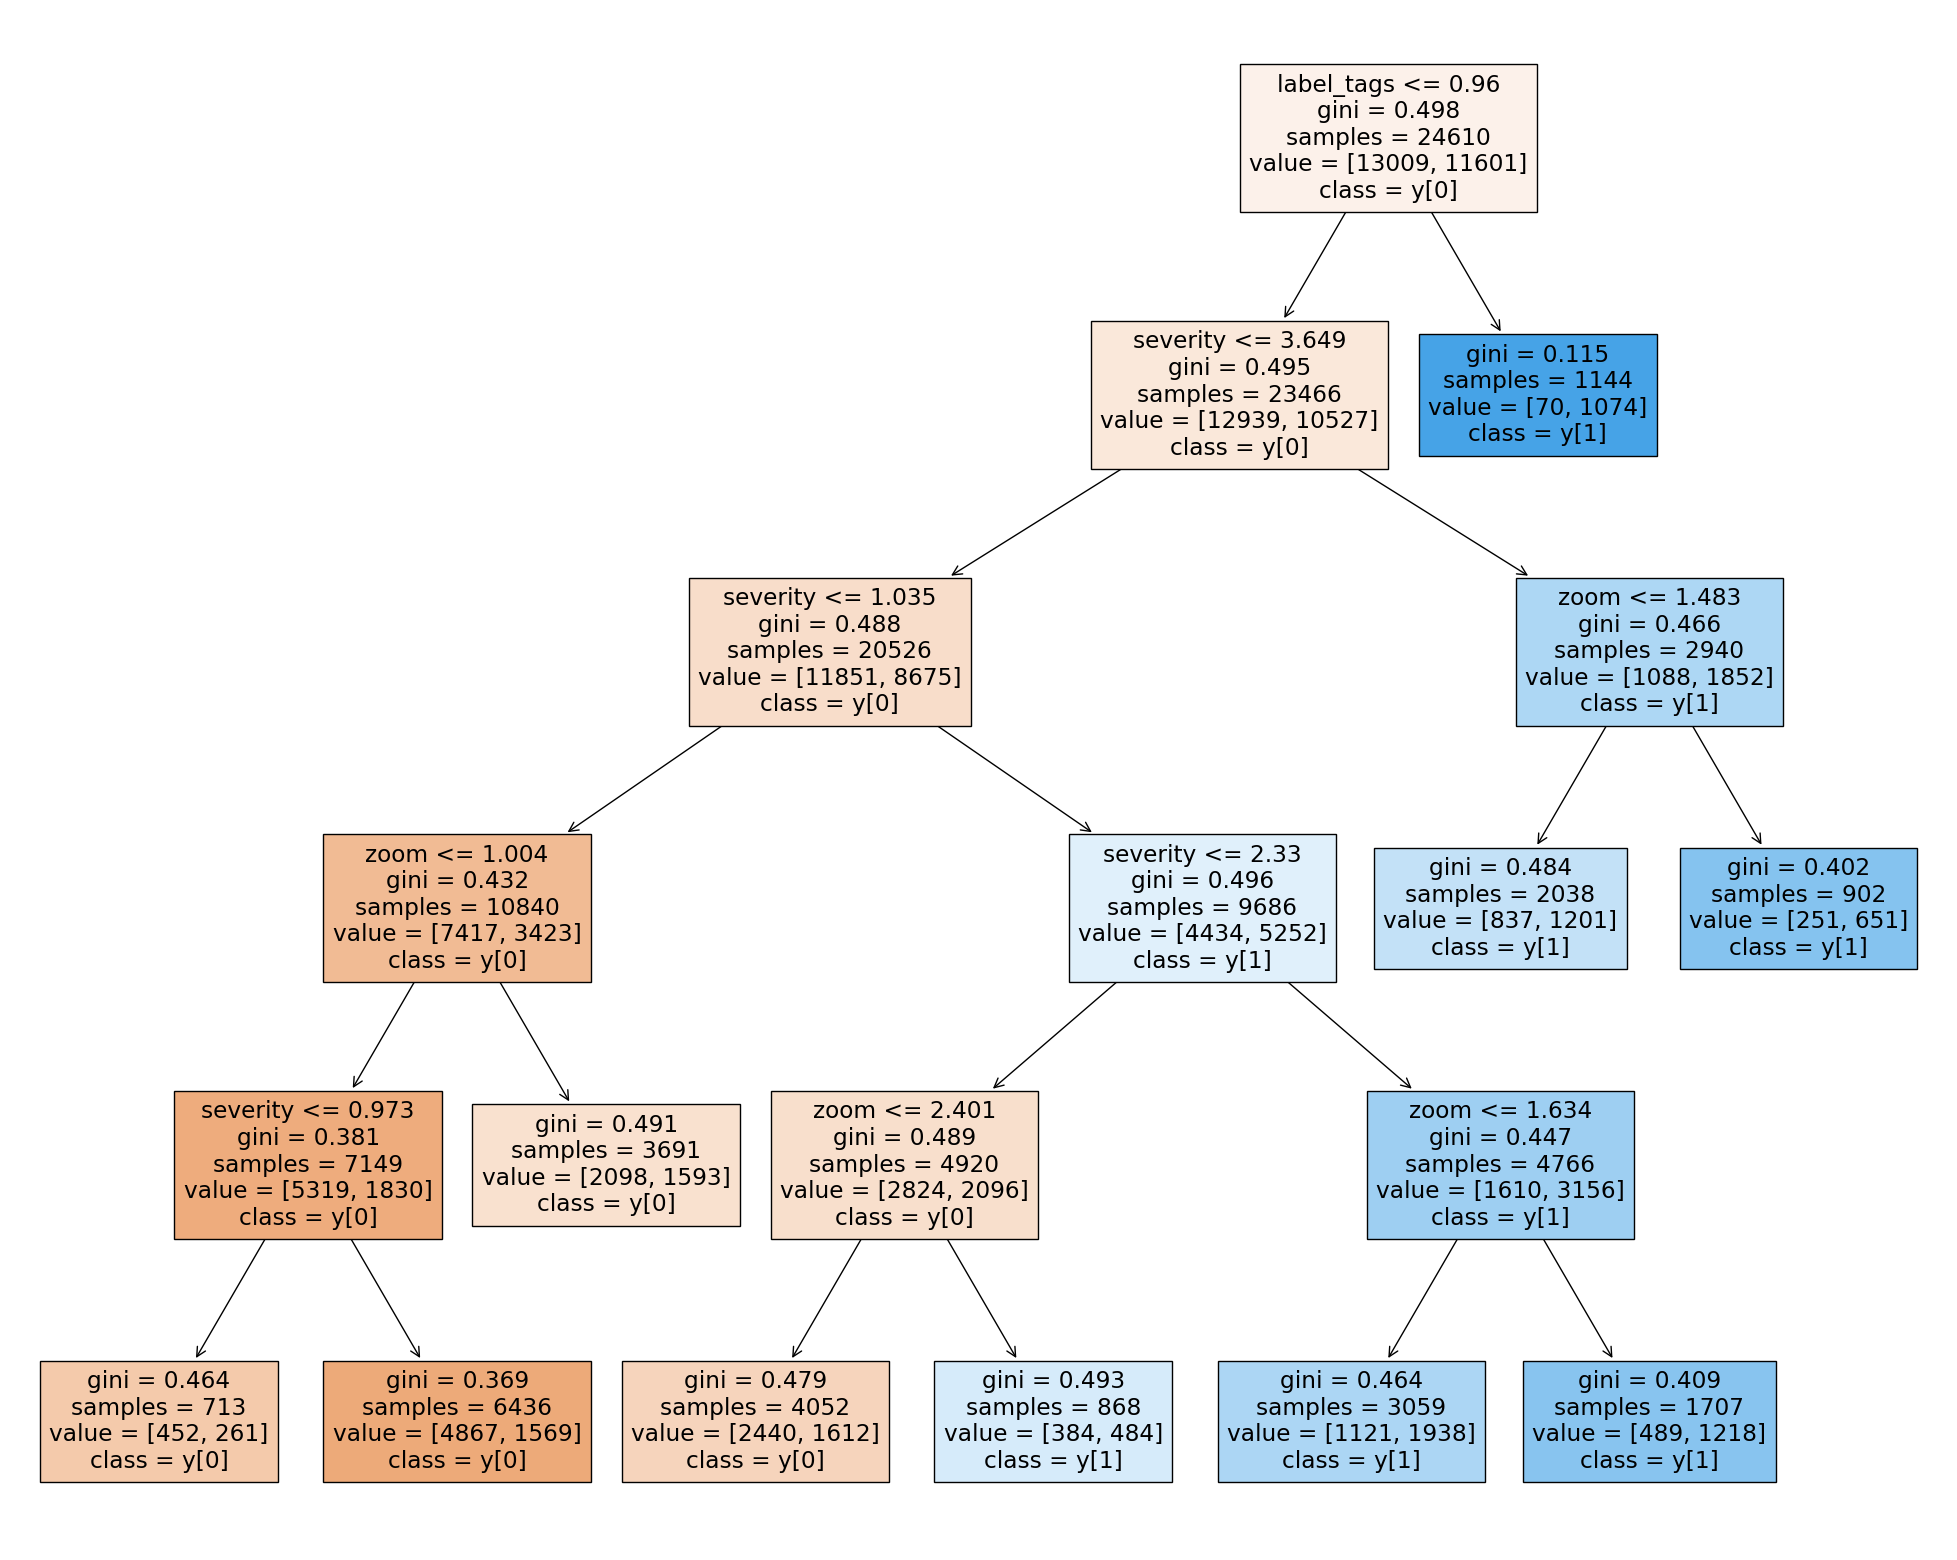

In [14]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
                feature_names=feature_cols,  
                class_names=True,
                filled=True)